In [1]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(url)

In [4]:
data.shape

(2157, 3)

In [5]:
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [6]:
data_rename ={
    'unfinished' : 'nao_finalizado',
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
}

In [7]:
data.rename(columns = data_rename, inplace = True)
data.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [8]:
troca = {
    0 : 1,
    1 : 0
}
data['finalizados'] = data.nao_finalizado.map(troca)
data.head()

,nao_finalizado,horas_esperadas,preco,finalizados
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [9]:
data.tail()

,nao_finalizado,horas_esperadas,preco,finalizados
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


In [10]:
import seaborn as sns

<Axes: xlabel='horas_esperadas', ylabel='preco'>

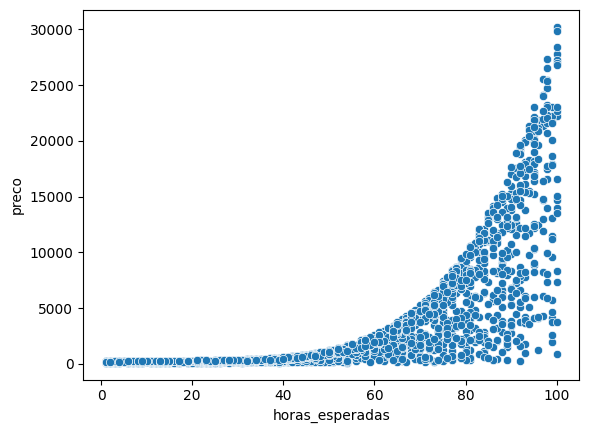

In [11]:
sns.scatterplot(x ='horas_esperadas', y = 'preco', data=data)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

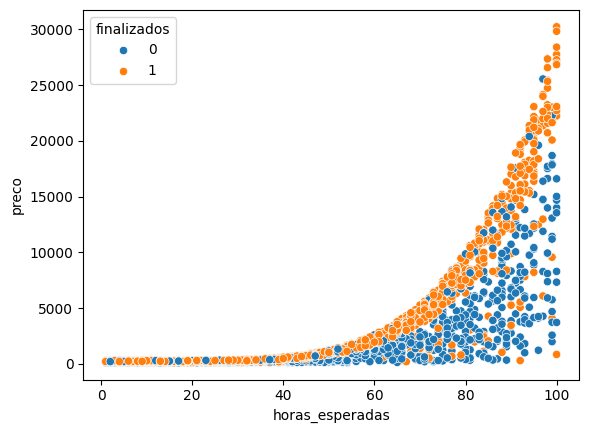

In [12]:
sns.scatterplot(x ='horas_esperadas', y = 'preco', hue='finalizados', data=data)

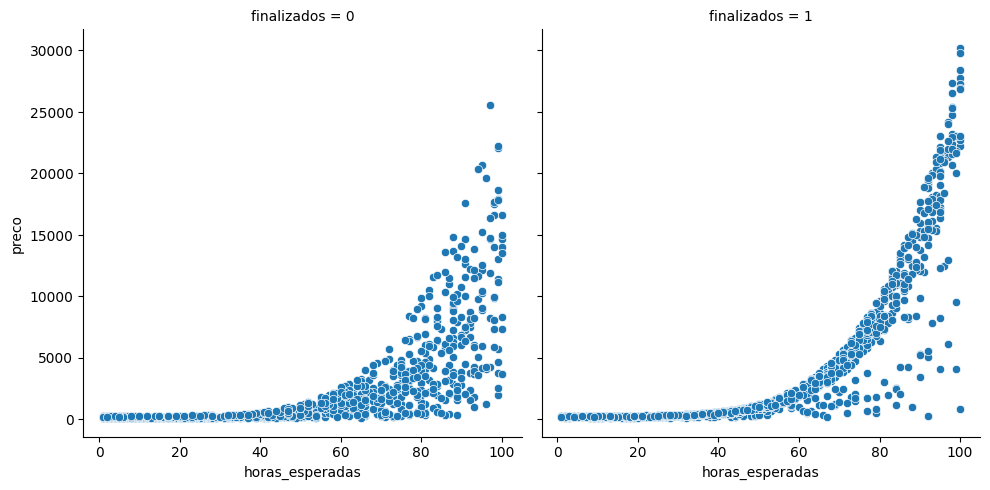

In [13]:
sns.relplot(x ='horas_esperadas', y = 'preco', col='finalizados', data=data)

In [14]:
x = data[['horas_esperadas', 'preco']]
y = data['finalizados']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [16]:
SEED = 20

In [17]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=SEED, test_size=0.25, stratify=y)

In [18]:
print("Treino realizado com %d elementos e teste com %d elementos" % (len(treino_x), len(teste_x)))

Treino realizado com 1617 elementos e teste com 540 elementos


In [19]:
model = LinearSVC()

In [20]:
model.fit(treino_x, treino_y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [21]:
predicts = model.predict(teste_x)

In [22]:
accuracy = accuracy_score(teste_y, predicts) * 100

In [23]:
print("A acurácia foi de %d %%" % accuracy)

A acurácia foi de 58 %


In [24]:
import numpy as np
predict_finished = np.ones(540)
accuracy = accuracy_score(teste_y, predict_finished) * 100
print("A acurácia com apenas projetos finalizados é de: %d %%" % accuracy)

A acurácia com apenas projetos finalizados é de: 52 %


<Axes: xlabel='horas_esperadas', ylabel='preco'>

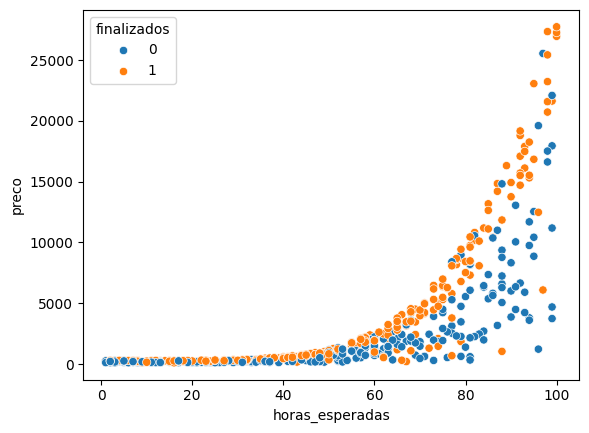

In [25]:
sns.scatterplot(x ='horas_esperadas', y = 'preco', hue=teste_y, data=teste_x)

In [26]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [27]:
pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min)/pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min)/pixels)

xx, yy = np.meshgrid(x_axis, y_axis)
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [28]:
points = np.c_[xx.ravel(), yy.ravel()]
points

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [29]:
z = model.predict(points)
z.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


(10000,)

In [30]:
xx.shape

(100, 100)

In [31]:
z = model.predict(points)
z = z.reshape(xx.shape)
z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [32]:
import matplotlib.pyplot as plt

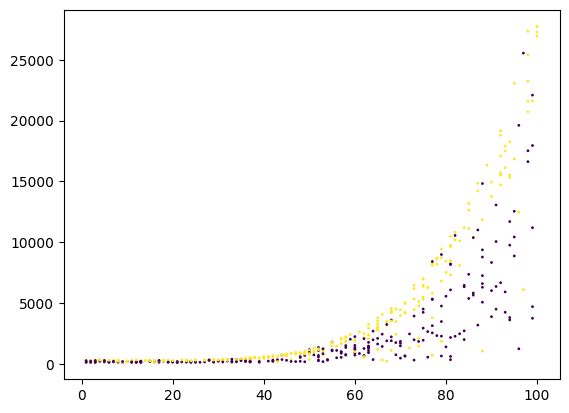

In [35]:
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

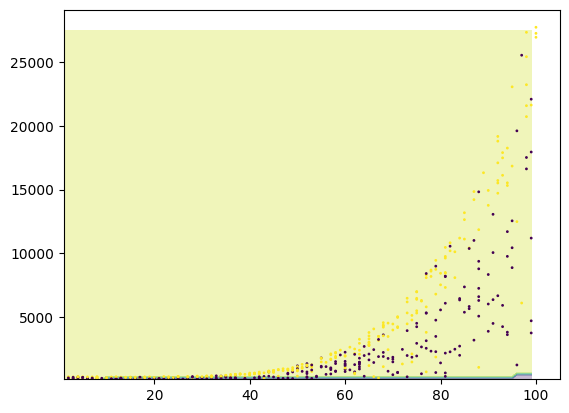

In [36]:
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)